In [1]:
from quantecon import DiscreteRV

In [2]:
psi=(0.1, 0.9)

In [3]:
d=DiscreteRV(psi)

In [4]:
d.draw(5)

array([1, 0, 1, 1, 0], dtype=int32)

In [5]:
import numpy as np
import quantecon as qe

def mc_sample_path(P, init=0, sample_size=1000):
    #===make sure P is a numpy array===#
    P=np.asarray(P)
    #===allocate memory===#
    X=np.empty(sample_size, dtype=int)
    X[0]=init
    #===convert each row of P into a distribution===#
    #in particular, P_dist[i] = the distribution corresponding to P[i,:]
    n=len(P)
    P_dist=[qe.DiscreteRV(P[i,:]) for i in range(n)]
    
    #===generate the sample path===#
    for t in range(sample_size-1):
        X[t+1]=P_dist[X[t]].draw()
        
    return X

In [6]:
P=[[0.4, 0.6], [0.2, 0.8]]
X=mc_sample_path(P, sample_size=100000)
np.mean(X==0)

0.25123000000000001

In [7]:
mc=qe.MarkovChain(P)
X=mc.simulate(ts_length=100000)
np.mean(X==0)

0.24882000000000001

In [9]:
%timeit mc_sample_path(P, sample_size=1000000)

1 loop, best of 3: 6.89 s per loop


In [10]:
%timeit mc.simulate(ts_length=1000000)

10 loops, best of 3: 59.9 ms per loop


In [11]:
mc=qe.MarkovChain(P, state_values=('employed', 'unemployed'))

In [12]:
mc.simulate(ts_length=4)

array(['unemployed', 'unemployed', 'unemployed', 'unemployed'], 
      dtype='<U10')

In [13]:
mc.simulate_indices(ts_length=4)

array([1, 1, 1, 1])

In [14]:
P=[[0.9, 0.1, 0.0],
  [0.4, 0.4, 0.2],
  [0.1, 0.1, 0.8]]

In [15]:
mc=qe.MarkovChain(P, ('poor', 'middle', 'rich'))

In [16]:
mc.is_irreducible

True

In [17]:
P=[[1.0, 0.0, 0.0],
  [0.1, 0.8, 0.1],
  [0.0, 0.2, 0.8]]

In [18]:
mc=qe.MarkovChain(P, ('poor', 'middle', 'rich'))

In [19]:
mc.is_irreducible

False

In [20]:
mc.communication_classes

[array(['poor'], 
       dtype='<U6'), array(['middle', 'rich'], 
       dtype='<U6')]

In [21]:
P=[[0, 1, 0],
  [0, 0, 1],
  [1, 0, 0]]

In [22]:
mc=qe.MarkovChain(P)

In [23]:
mc.period

3

In [24]:
P=[[0.0, 1.0, 0.0, 0.0],
  [0.5, 0.0, 0.5, 0.0],
  [0.0, 0.5, 0.0, 0.5],
  [0.0, 0.0, 1.0, 0.0]]

In [25]:
mc=qe.MarkovChain(P)

In [26]:
mc.period

2

In [27]:
mc.is_aperiodic

False

In [28]:
P=np.array([[.4, .6], [.2, .8]])

In [29]:
psi=(0.25, 0.75)

In [30]:
np.dot(psi, P)

array([ 0.25,  0.75])

In [31]:
P=[[0.4, 0.6], [0.2, 0.8]]
mc=qe.MarkovChain(P)
mc.stationary_distributions #show all stationary distributions

array([[ 0.25,  0.75]])

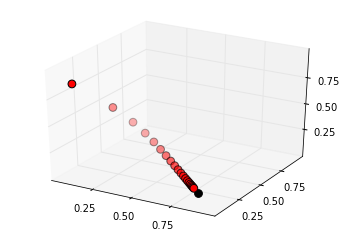

In [32]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

P=((0.971, 0.029, 0.000),
  (0.145, 0.778, 0.077),
  (0.000, 0.508, 0.492))

P=np.array(P)

psi=(0.0, 0.2, 0.8) #initial condition

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xticks((0.25, 0.5, 0.75))
ax.set_yticks((0.25, 0.5, 0.75))
ax.set_zticks((0.25, 0.5, 0.75))

x_vals, y_vals, z_vals=[], [], []
for t in range(20):
    x_vals.append(psi[0])
    y_vals.append(psi[1])
    z_vals.append(psi[2])
    psi=np.dot(psi, P)
    
ax.scatter(x_vals, y_vals, z_vals, c='r', s=60)

mc=qe.MarkovChain(P)
psi_star=mc.stationary_distributions[0]
ax.scatter(psi_star[0], psi_star[1], psi_star[2], c='k', s=60)

plt.show()

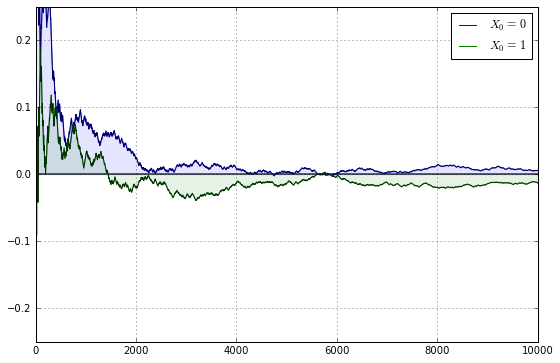

In [33]:
alpha=beta=0.1
N=10000
p=beta/(alpha+beta)

P=((1-alpha, alpha),
  (beta, 1-beta))
P=np.array(P)
mc=qe.MarkovChain(P)

fig, ax=plt.subplots(figsize=(9, 6))
ax.set_ylim(-0.25, 0.25)
ax.grid()
ax.hlines(0, 0, N, lw=2, alpha=0.6) #horizonal line at zero

for x0, col in ((0, 'blue'), (1, 'green')):
    #==generate time series for worker that starts at x0==#
    X=mc.simulate(N, init=x0)
    #==compute fraction of time spent unemploted, for each n==#
    X_bar=(X==0).cumsum()/(1+np.arange(N, dtype=float))
    #==plot==#
    ax.fill_between(range(N), np.zeros(N), X_bar-p, color=col, alpha=0.1)
    ax.plot(X_bar-p, color=col, label=r'$X_0=\, {} $'.format(x0))
    ax.plot(X_bar-p, 'k-', alpha=0.6) #overlay in black -- make lines clearer

ax.legend(loc='upper right')

In [34]:
%%file web_graph_data.txt
a -> d;
a -> f;
b -> j;
b -> k;
b -> m;
c -> c;
c -> g;
c -> j;
c -> m;
d -> f;
d -> h;
d -> k;
e -> d;
e -> h;
e -> l;
f -> a;
f -> b;
f -> j;
f -> l;
g -> b;
g -> j;
h -> d;
h -> g;
h -> l;
h -> m;
i -> g;
i -> h;
i -> n;
j -> e;
j -> i;
j -> k;
k -> n;
l -> m;
m -> g;
n -> c;
n -> j;
n -> m;

Writing web_graph_data.txt


In [36]:
"""
return list of pages, ordered by rank
"""

from operator import itemgetter
import re

infile='web_graph_data.txt'
alphabet='abcdefghijklmnopqrstuvwxyz'

n=14 #total number of web pages (nodes)

#==create a matrix Q indicating existence of links==#
# *Q[i, j] =1 if there is a link from i to j
# *Q[i, j]=1 otherwise
Q=np.zeros((n, n), dtype=int)
f =open(infile, 'r')
edges=f.readlines()
f.close()
for edge in edges:
    from_node, to_node=re.findall('\w', edge)
    i, j=alphabet.index(from_node), alphabet.index(to_node)
    Q[i, j]=1
#==create the corresponding Markov matrix P==#
P=np.empty((n, n))
for i in range(n):
    P[i, :] =Q[i, :] / Q[i, :].sum()
mc=qe.MarkovChain(P)    
#==compute the stationary distribution r==#
r=mc.stationary_distributions[0]
ranked_pages={alphabet[i] : r[i] for i in range(n)}
#==print solution, sorted from highest to lowest rank==#
print('Ranking\n ***')
for name, rank in sorted(ranked_pages.items(), key=itemgetter(1), reverse=1):
    print('{0}: {1:.4}'.format(name, rank))

Ranking
 ***
g: 0.1607
j: 0.1594
m: 0.1195
n: 0.1088
k: 0.09106
b: 0.08326
i: 0.05312
e: 0.05312
c: 0.04834
h: 0.0456
l: 0.03202
d: 0.03056
f: 0.01164
a: 0.002911


In [40]:
from math import erfc, sqrt
from numba import njit

def tauchen(rho, sigma_u, m=3, n=7):
    
    """
    computes a markov chain associated with a discretized version of 
    the linear Gaussian AR(1) process
    
        y_{t+1} =rho * y_{t} +u_{t+1}
        
    using Tauchen's method. here {u_t} is an iid Gaussian process with
    zero mean.
    
    parameters
    ------
    rho: scalar(float)
        The autocorrelation coefficient
    sigma_u : scalar(float)
        The standard deviation of the random process
    m : scalar(int), optional(default=3)
        The number of standard deviations to approximate out to
    n : scalar(int), optional(default=7)
        The number of states to use in the approximation
        
    returns
    ------
    
    mc : MarkovChain
        An instance of the MarkovChain class that stores the transition
        matrix and state values returned by the discretization method
        
    """
    
    # standard deviation of y_t
    std_y = np.sqrt(sigma_u**2 / (1-rho**2))
    
    # top of discrete state space
    x_max = m * std_y
    
    # bottom of discrete state space
    x_min = -x_max
    
    #discretized state space
    x = np.linspace(x_min, x_max, n)
    
    step = (x_max - x_min) / (n-1)
    half_step = 0.5 * step
    P = np.empty((n, n))
    
    _fill_tauchen(x, P, n, rho, sigma_u, half_step)
    
    mc = qe.MarkovChain(P, state_values=x)
    return mc

@njit
def std_norm_cdf(x):
    return 0.5 * erfc(-x / sqrt(2))

@njit
def _fill_tauchen(x, P, n, rho, sigma, half_step):
    for i in range(n):
        P[i, 0]=std_norm_cdf((x[0] - rho * x[i] +half_step) / sigma)
        P[i, n-1]=1- \
        std_norm_cdf((x[n-1] - rho * x[i] -half_step) / sigma)
        for j in range(1, n-1):
            z=x[j] - rho * x[i]
            P[i, j] = (std_norm_cdf((z + half_step) /sigma)-
                      std_norm_cdf((z - half_step) / sigma))

In [41]:
tauchen(0.6, 1.0)

Markov chain with transition matrix 
P = 
[[  1.90786953e-01   4.55382814e-01   3.01748954e-01   5.00611419e-02
    2.00160075e-03   1.84984465e-05   3.82913410e-08]
 [  5.20812794e-02   3.01748954e-01   4.55382814e-01   1.73993646e-01
    1.64242280e-02   3.67205462e-04   1.87299201e-06]
 [  8.77447510e-03   1.21520042e-01   4.19443708e-01   3.65696053e-01
    8.02332740e-02   4.27913601e-03   5.33123498e-05]
 [  8.89025299e-04   2.95073365e-02   2.35589167e-01   4.68028942e-01
    2.35589167e-01   2.95073365e-02   8.89025299e-04]
 [  5.33123498e-05   4.27913601e-03   8.02332740e-02   3.65696053e-01
    4.19443708e-01   1.21520042e-01   8.77447510e-03]
 [  1.87299201e-06   3.67205462e-04   1.64242280e-02   1.73993646e-01
    4.55382814e-01   3.01748954e-01   5.20812794e-02]
 [  3.82913411e-08   1.84984465e-05   2.00160075e-03   5.00611419e-02
    3.01748954e-01   4.55382814e-01   1.90786953e-01]]